# Interrogating data from a small molecule screen for antibacterial activity against methicillin-resistant Staphylococcus aureus
## Introduction
Infections arising from pathogenic bacteria are typically combatted with antibiotics but resistace to these drugs is increasing. Multidrug-resistant bacterial species such as methicillin-resistant Staphylococcus aureus (MRSA) exhibit resistance to most of the drugs currently used making them difficult to treat and leading to greater disease burden and, in many cases, death. Resistance mechanisms arise through random mutagenesis that confer specific resistance to a class of related antibiotics thereby improving the fitness of these bacteria when subjected to antibiotics such as oxacillin. Unfortunately, there have been very few novel chemotypes developed as new antibiotics in the last 40 years meaning that there are no alternative treatments. It is therefore imperative to identify new chemistry that is effective as antibiotic agents. Herein, growth inhibition data from an initial screen of a compound library against live culture of MRSA is to be interrogated to highlight those compounds that might offer a starting point for antibiotic development and therefore be of interest for further experimental work. The compound library consisted of 960 diverse low molecular weight 'fragments', each containing a stable electrophilic warhead, capable of forming irreversible covalent bonds with nucleophilic side chains of specific amino acids under physiological conditions. Each fragment was tested at 100 uM final assay concentration and replicates were performed in independent experiments in singlicate. All raw data was normalised to on-plate controls and a reference antibiotic, oxacillin, was used to confirm consistent pharmacological performance between plates. It is hoped that the ability to form specific covalent interactions when stably bound to a target protein will improve potency and selectivity of any candidate developed from such a hit.

In [63]:
#Checks working directory and changes it to the correct cwd for this project.

import os
cwd = os.getcwd()
os.chdir(cwd)

In [64]:
# Imports pandas for working with csv data file

import pandas as pd

In [65]:
# Import the data from a csv

df = pd.read_csv("SFFdata.csv")
print(df.shape)
print(df.columns)

(960, 24)
Index(['Structure [idcode]', 'Structure No', 'Catalog ID', 'Plate_ID', 'Well',
       'V, ÂµL', 'Conc, mM', 'Formula', 'SMILES', 'MW', 'Purity', 'PO',
       'MW_salt', 'Stereochem.data', 'Geometric.isomer', 'Chemical name',
       'ClogP', 'logS', 'HBD', 'HBA', 'TPSA', 'RotBonds', '% inh rep1',
       '% inh rep2'],
      dtype='object')


In [67]:
# Checks data structure and header names

df.head()

,Structure [idcode],Structure No,Catalog ID,Plate_ID,Well,"V, ÂµL","Conc, mM",Formula,SMILES,MW,...,Geometric.isomer,Chemical name,ClogP,logS,HBD,HBA,TPSA,RotBonds,% inh rep1,% inh rep2
0,fjmQa@CEQ``@bDaddeTRVRbRdteASKP@UUUYP|P@ !B?Hb...,1,Z4607531405,1907006-Y10-01,A03,10,10,C14H17FN2O3S,CC1(CN(Cc(cc2)ccc2OS(F)(=O)=O)CCC1)C#N,312.3598,...,NaN,4-[(3-cyano-3-methylpiperidin-1-yl)methyl]phen...,"1,142","-2,544",0,4,"70,4",4,6.373117,-6.527094
1,dcMDPJYL@HbPrRRqIQCLl@E@@@ !B?[^H_PJHmpK~@K]}m...,2,Z1255439327,1907006-Y10-01,B03,10,10,C6H7FN2O2S,Cc1nc(S(F)(=O)=O)nc(C)c1,190.1954,...,NaN,"4,6-dimethylpyrimidine-2-sulfonyl fluoride","1,046","-1,602",0,4,"59,92",1,-6.488992,11.822660
2,fnsQQ@CQQ`aZ`BHRFRRUQIYJIJYJRTEIVrt@EUUTqRODIh...,3,Z4607531281,1907006-Y10-01,C03,10,10,C14H17FN2O5S,O=C1N[C@H](CN(Cc(cc2)ccc2OS(F)(=O)=O)CC2)[C@H]...,344.3586,...,Cis,"rac-4-{[(4aR,8aS)-3-oxo-octahydro-2H-pyrido[4,...","-0,435","-2,52",1,5,"84,94",4,-0.115875,-2.093596
3,dklBpDsS@HbPhHrRRqIYSaeijfP@ !BYuLlYq`lTq`ZXG?...,4,Z2216274541,1907006-Y10-01,D03,10,10,C6H5FO4S2,OC(Cc([s]1)ccc1S(F)(=O)=O)=O,224.2299,...,NaN,2-[5-(fluorosulfonyl)thiophen-2-yl]acetic acid,"1,329","-2,081",1,4,"71,44",3,6.056018,17.525773
4,fakQS@EZ`cK^`BBaEYCIIBeDdThdleIQdmQRmUUu@ATmBJ...,5,Z4607531395,1907006-Y10-01,E03,10,10,C14H15FN2O5S2,N#C[C@@](CN(Cc(cc1)ccc1OS(F)(=O)=O)C1)(C2)[C@@...,374.4077,...,Trans,"rac-4-{[(3aR,6aS)-3a-cyano-2,2-dioxo-hexahydro...","-0,171","-2,113",0,6,"104,54",4,-22.710068,1.374570


In [5]:
# Remove unwanted columns:
# "Structure [idcode], "Formula", and "Chemical name" contains the same information as SMILES and are not easily read by the modules to be used in the current script
# "Plate_ID", "Well", "V, ÂµL", "PO", Conc, mM", "Purity" are all values associated with the physical storage of the compounds and are not variables associated with the final results from the experiment
# "Stereochem.data" and "Geometric.isomer" may be important but are not relevant to a majority of the compounds so have been omitted for now from further analysis

df = df.drop(columns = ["Structure [idcode]","Plate_ID","Well","V, ÂµL","PO","Conc, mM","Formula","Purity",'Stereochem.data', 'Geometric.isomer',"Chemical name"])

In [6]:
# Check structure of new dataframe
print(df.shape)
print(df.columns)

(960, 13)
Index(['Structure No', 'Catalog ID', 'SMILES', 'MW', 'MW_salt', 'ClogP',
       'logS', 'HBD', 'HBA', 'TPSA', 'RotBonds', '% inh rep1', '% inh rep2'],
      dtype='object')


In [7]:
# Columns "% inh rep1" and "% inh rep2" are biological replicate measurements of cell death after incubation.
# They can be better summarized by taking an average, "% inh average (n=2)" and range, "% inh range (n=2)".

df["% inh average (n=2)"] = (df["% inh rep1"] + df["% inh rep2"])/2
df["% inh range (n=2)"] = abs(df["% inh rep1"] - df["% inh rep2"])

In [8]:
# Checks the data types contained within each column of the dataframe
print(df.dtypes)

Structure No             int64
Catalog ID              object
SMILES                  object
MW                     float64
MW_salt                float64
ClogP                   object
logS                    object
HBD                      int64
HBA                      int64
TPSA                    object
RotBonds                 int64
% inh rep1             float64
% inh rep2             float64
% inh average (n=2)    float64
% inh range (n=2)      float64
dtype: object


In [9]:
# Some of the columns contain object data types due to commas replacing decimal points. 
# Replace all commas in ClogP,logS and TPSA columns with decimal points:

columnstomodify = ["ClogP", "logS", "TPSA"]

df[columnstomodify] = df[columnstomodify].apply(lambda col: col.str.replace(',', '.').astype(float))

In [10]:
# Checks the data types contained within each column of the dataframe
print(df.dtypes)

Structure No             int64
Catalog ID              object
SMILES                  object
MW                     float64
MW_salt                float64
ClogP                  float64
logS                   float64
HBD                      int64
HBA                      int64
TPSA                   float64
RotBonds                 int64
% inh rep1             float64
% inh rep2             float64
% inh average (n=2)    float64
% inh range (n=2)      float64
dtype: object


In [11]:
# Now to plot a correlation matrix to see if there are any possible colinear factors. 
# Catalog ID is an identifier string and should not be considered in any correlation. Other identifying factors also don't make sense to include: "Structure No". "MW_salt" is irrelevent since the salt ion is not expected to be the active species.
# To deal with this, an intermediate dataframe, "selected_columns" is created containing only the factors we wish to correlate.

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dfcolumns = df.columns.tolist()

itemstoremove = ["Structure No","Catalog ID","SMILES","MW_salt"]

selected_columns = [item for item in dfcolumns if item not in itemstoremove]

print(selected_columns)

['MW', 'ClogP', 'logS', 'HBD', 'HBA', 'TPSA', 'RotBonds', '% inh rep1', '% inh rep2', '% inh average (n=2)', '% inh range (n=2)']


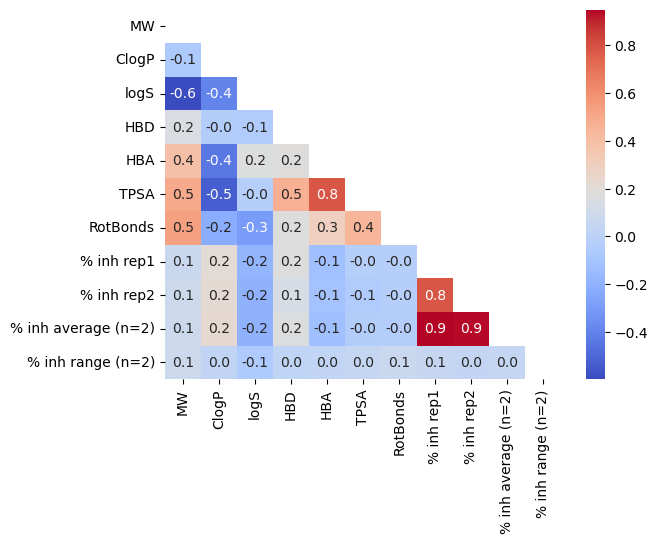

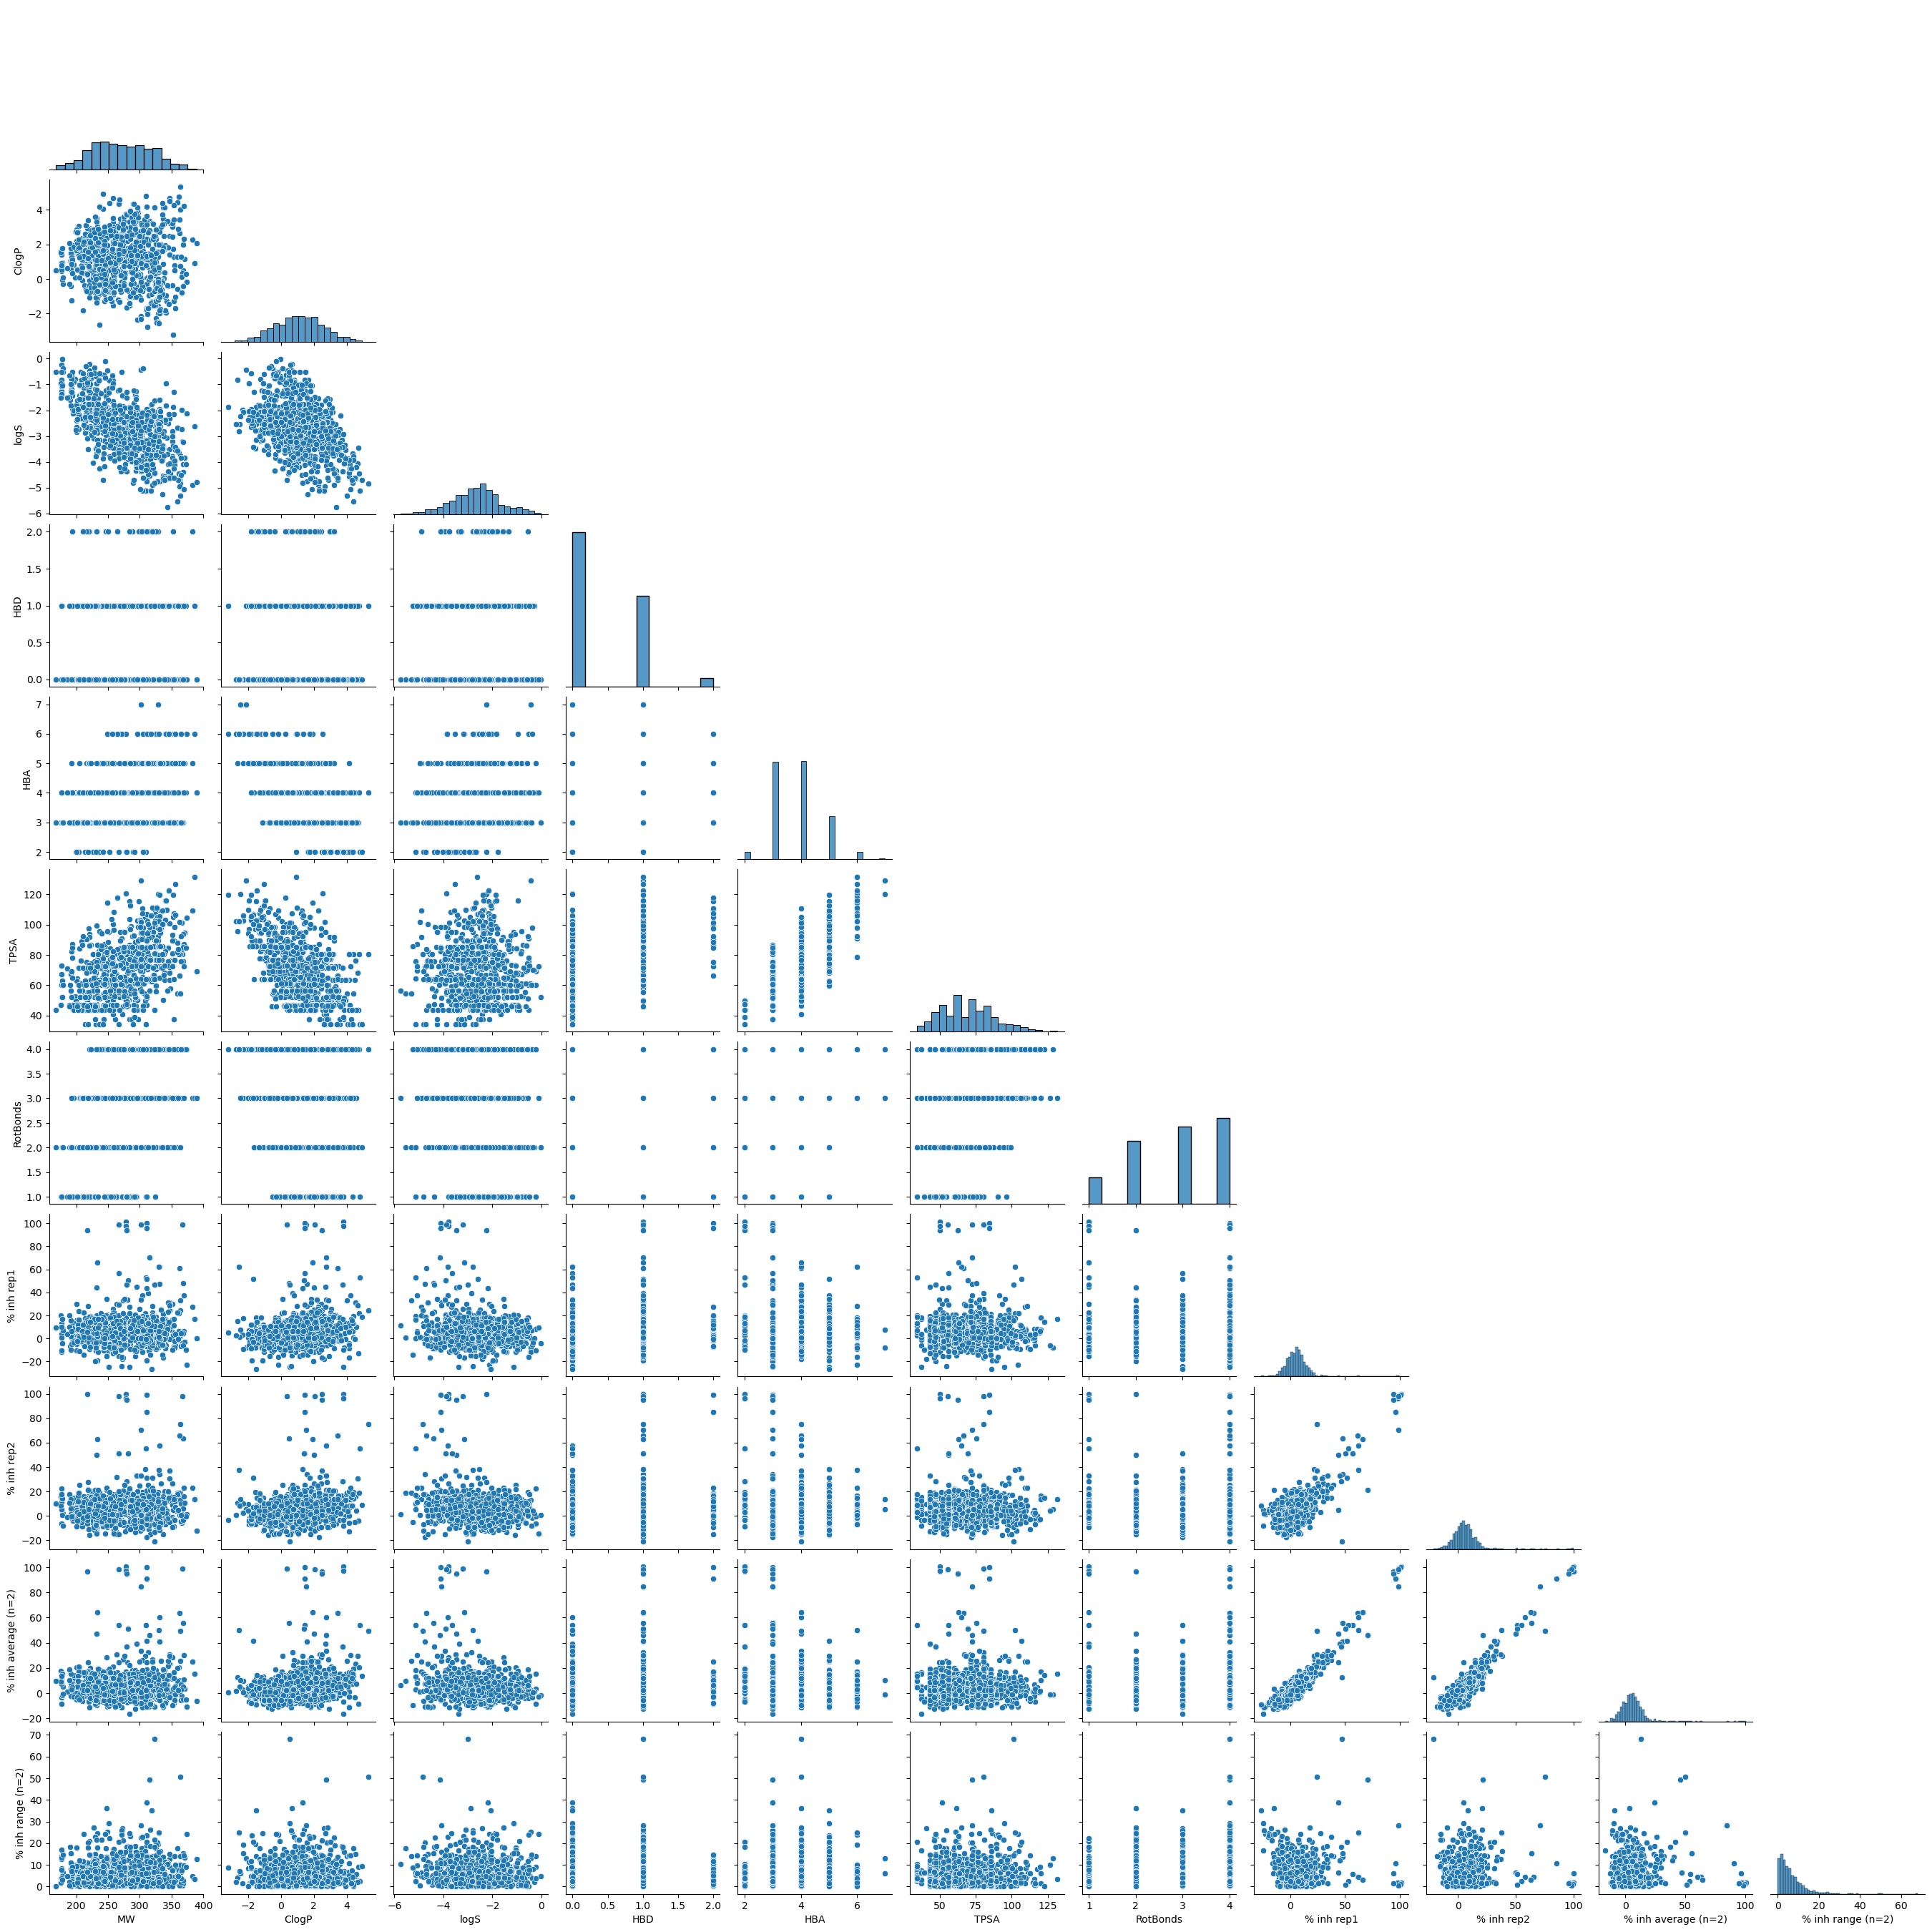

In [12]:
# Here, correlation is being investigated for all pairs of variables in the selected columns object. 

corr= df[selected_columns].corr() # This calculates the correlation between each pair of variables

topcornmask = np.triu(corr) # Specifies the top corner of the matrix plot

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f", mask = topcornmask) # Plots a heat map of correlation values (1 represents a perfect positive correlation and -1 represents a perfect negative correlation). Uses the top corner as a mask in the final plot so no plots are replicated

sns.pairplot(df[selected_columns], corner = True)

# Things to look at in the below correlation matrix:
# Correlation between biological replicates 1 and 2 is strong meaning they are appropriately consistent. The average of the two correlates strongly with each replicate dataset meaning it is suitably representative for use going forwards.
# Correlation between biological response average and range (does variability correlate with response magnitude?)
# Correlation between average biological response and any chemical property
# Also of interest is whether any chemical properties are colinear - I do not fully understand these parameters so this might guide me to which are important.

## Correlation plot outcomes
1) There are several apparent strongly correlating factors. % inh average strongly correlates with % inh rep1 and % inh rep2 because it is an average of the two variables. i.e. as % inh rep1 or % inh rep2 increases, so to does % inh average (n=2) by half the amount.
2) % inh rep 1 and % inh rep 2 shows strong correlation. These are biological replicate measurements of the same experiment on the same test compounds. We would expect to see strong correlation here so this validates that the experiments were performed in a similar way to obtain similar repeat measurements and that the assay itself is robust at detecting changes in cell growth inhibition.

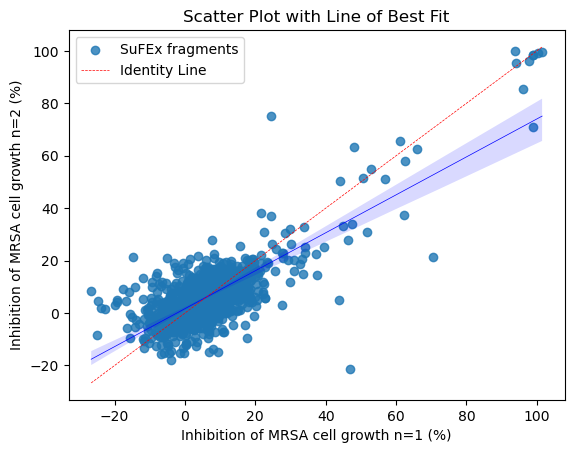

In [13]:
sns.regplot(x = df["% inh rep1"], y = df["% inh rep2"], data = df, line_kws={"color": "blue", "lw": 0.5}, label = "SuFEx fragments")

plt.title("Scatter Plot with Line of Best Fit")
plt.xlabel("Inhibition of MRSA cell growth n=1 (%)")
plt.ylabel("Inhibition of MRSA cell growth n=2 (%)")

# Adding a line of identity

min_val = min(df['% inh rep1'].min(), df['% inh rep2'].min())
max_val = max(df['% inh rep1'].max(), df['% inh rep2'].max())

# The above lines enable fitting of the line of identity to dynamically cover the full range of y and x values.

plt.plot([min_val,max_val], [min_val,max_val], color='red', linestyle='--', linewidth=.5, label='Identity Line')
plt.legend()
plt.show()

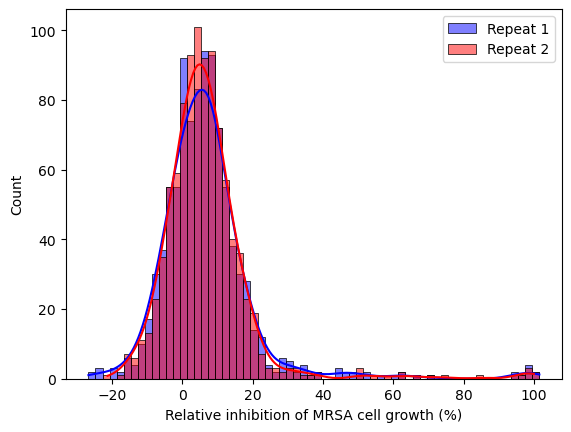

In [14]:
sns.histplot(data = df, x = "% inh rep1", color = "blue",binwidth = 2, label = "Repeat 1", legend = True, binrange = [min_val, max_val], kde = True)
sns.histplot(data = df, x = "% inh rep2", color = "red", binwidth = 2, label = "Repeat 2", legend = True, binrange = [min_val, max_val], kde = True)

plt.xlabel("Relative inhibition of MRSA cell growth (%)")
plt.legend()

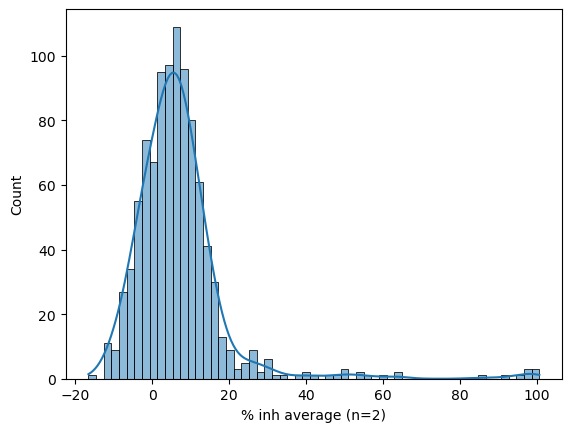

In [15]:
avinhhistogram = sns.histplot(data = df, x = "% inh average (n=2)", binwidth  = 2, kde = True)

In [16]:
df.head()

,Structure No,Catalog ID,SMILES,MW,MW_salt,ClogP,logS,HBD,HBA,TPSA,RotBonds,% inh rep1,% inh rep2,% inh average (n=2),% inh range (n=2)
0,1,Z4607531405,CC1(CN(Cc(cc2)ccc2OS(F)(=O)=O)CCC1)C#N,312.3598,0.0,1.142,-2.544,0,4,70.40,4,6.373117,-6.527094,-0.076988,12.900211
1,2,Z1255439327,Cc1nc(S(F)(=O)=O)nc(C)c1,190.1954,0.0,1.046,-1.602,0,4,59.92,1,-6.488992,11.822660,2.666834,18.311652
2,3,Z4607531281,O=C1N[C@H](CN(Cc(cc2)ccc2OS(F)(=O)=O)CC2)[C@H]...,344.3586,0.0,-0.435,-2.520,1,5,84.94,4,-0.115875,-2.093596,-1.104735,1.977721
3,4,Z2216274541,OC(Cc([s]1)ccc1S(F)(=O)=O)=O,224.2299,0.0,1.329,-2.081,1,4,71.44,3,6.056018,17.525773,11.790896,11.469755
4,5,Z4607531395,N#C[C@@](CN(Cc(cc1)ccc1OS(F)(=O)=O)C1)(C2)[C@@...,374.4077,0.0,-0.171,-2.113,0,6,104.54,4,-22.710068,1.374570,-10.667749,24.084639


# Substructure search using rdkit
The fragment library contains fragments with one of two distinct electrophilic sulfur (VI) fluoride warheads.
<br> S(=O)(=O)(F)*
<br> S(=O)(=O)(F)O*
<br>where * denotes a variable entity.
<br> The former is more reactive and therefore would be expected to have a higher propensity for nonspecific conjugation across the proteome. It is of interest to be able to differentiate individual fragments containing each motif to see if one is a preferred electrophile.

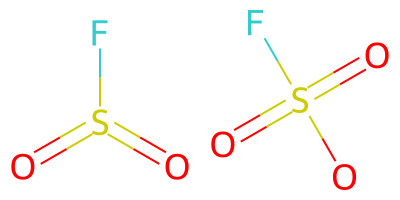

In [17]:
import rdkit

from rdkit import Chem

substruc1 = Chem.MolFromSmarts("S(=O)(=O)(-F)")
substruc2 = Chem.MolFromSmarts("S(=O)(=O)(-F)-O")

substruc_list = [substruc1, substruc2]

from rdkit.Chem import Draw

# Generate a grid image of molecules
img = Draw.MolsToGridImage(substruc_list, molsPerRow=2, subImgSize=(200, 200))

# Display the image (works in Jupyter or save as a file)
img  # Use img.save("molecules.png") to save

In [18]:
# Run this in the terminal: "pip install rdkit"

import rdkit

from rdkit import Chem

smiles_list = df["SMILES"]
query_smiles = ["C-S(=O)(=O)-F", "S(=O)(=O)(-F)-O"]

def search_structure(pattern):
    for idx,smiles in enumerate(smiles_list):
        m = Chem.MolFromSmiles(smiles)   

smiles_1a  = smiles_list[0]
query1 = Chem.MolFromSmarts(query_smiles[1]) # this part dictates what substructure should be searched for

#print("\nSMILES search: {}".format(Chem.MolToSmiles(query1))) # this part labels the query at the top of the printed output
search_structure(query1)

# all fragments will contain O=S(=O)F but a subselection will contain O=S(=O)(O)F. Here, we only search for the presence of O=S(=O)(O)F.

In [19]:
df["O=S(=O)(O)F"] = df["SMILES"].apply(lambda x: Chem.MolFromSmiles(x).HasSubstructMatch(query1)) 

# Adds a True/False column for whether each fragment contains the O=S(=O)(O)F substructure. If False, can be assumed to contain O=S(=O)F instead.

In [20]:
df.head()

,Structure No,Catalog ID,SMILES,MW,MW_salt,ClogP,logS,HBD,HBA,TPSA,RotBonds,% inh rep1,% inh rep2,% inh average (n=2),% inh range (n=2),O=S(=O)(O)F
0,1,Z4607531405,CC1(CN(Cc(cc2)ccc2OS(F)(=O)=O)CCC1)C#N,312.3598,0.0,1.142,-2.544,0,4,70.40,4,6.373117,-6.527094,-0.076988,12.900211,True
1,2,Z1255439327,Cc1nc(S(F)(=O)=O)nc(C)c1,190.1954,0.0,1.046,-1.602,0,4,59.92,1,-6.488992,11.822660,2.666834,18.311652,False
2,3,Z4607531281,O=C1N[C@H](CN(Cc(cc2)ccc2OS(F)(=O)=O)CC2)[C@H]...,344.3586,0.0,-0.435,-2.520,1,5,84.94,4,-0.115875,-2.093596,-1.104735,1.977721,True
3,4,Z2216274541,OC(Cc([s]1)ccc1S(F)(=O)=O)=O,224.2299,0.0,1.329,-2.081,1,4,71.44,3,6.056018,17.525773,11.790896,11.469755,False
4,5,Z4607531395,N#C[C@@](CN(Cc(cc1)ccc1OS(F)(=O)=O)C1)(C2)[C@@...,374.4077,0.0,-0.171,-2.113,0,6,104.54,4,-22.710068,1.374570,-10.667749,24.084639,True


# Labelling chemical 'hits'
## Theory
When identifying chemical hits, we are looking for outliers in the dataset since we can assume that a majority of small molecules will have no effect on the biology. If the data distribution were approximated by a normal distribution, the variance from the sample mean can be used to statistically indicate what results are outliers and likely to be 'real' effects rather than random noise. According to the normal distribution, 99.7 % of all measurements of the same value will fall within 3 standard deviations of the population mean. Since we assume that if we measured infinite chemical structures against bacteria, the mean value would be somewhere near 0 % (no inhibition), any value beyond 3 standard deviations from this mean can be treated as significantly different from the rest of the population and therefore more likely to have a real biological effect rather than being simply down to chance. Since all values are, themselves an average of 2 independent measurements, we have already somewhat controlled for the likely event that random variation would give arise to false positives. This methodology highlights which chemical compounds are worth following up with further experimental interrogation.

In [21]:
# this will pull up a nice figure of a normal distribution with standard deviations to clarify the text above - just remove the hash from the bottom line and run

from PIL import Image
import requests
from io import BytesIO

response = requests.get("https://www.nlm.nih.gov/oet/ed/stats/img/Distribution_14.png")
img = Image.open(BytesIO(response.content))
#img.show()

In [22]:
# First, summary statistics must be collected on the % inh average (n=2) column

mean = df["% inh average (n=2)"].mean()
stdev = df["% inh average (n=2)"].std()

print("Mean:",mean,"Standard deviation:",stdev)

Mean: 6.804955611860416 Standard deviation: 12.798044185280444


In [23]:
# We can then find the threshold value for a compound to be considered a 'hit'

signifthreshold = mean + 3* stdev
print("Significance threshold for anti-MRSA activity:",signifthreshold)

Significance threshold for anti-MRSA activity: 45.199088167701746


In [24]:
# Add column for active hit or inactive

average = [df["% inh average (n=2)"]]

def activitycat(average):
    if average > signifthreshold:
        return "active"
    else:
        return "inactive"

df["activity"] = df["% inh average (n=2)"].apply(activitycat)

df.head()

,Structure No,Catalog ID,SMILES,MW,MW_salt,ClogP,logS,HBD,HBA,TPSA,RotBonds,% inh rep1,% inh rep2,% inh average (n=2),% inh range (n=2),O=S(=O)(O)F,activity
0,1,Z4607531405,CC1(CN(Cc(cc2)ccc2OS(F)(=O)=O)CCC1)C#N,312.3598,0.0,1.142,-2.544,0,4,70.40,4,6.373117,-6.527094,-0.076988,12.900211,True,inactive
1,2,Z1255439327,Cc1nc(S(F)(=O)=O)nc(C)c1,190.1954,0.0,1.046,-1.602,0,4,59.92,1,-6.488992,11.822660,2.666834,18.311652,False,inactive
2,3,Z4607531281,O=C1N[C@H](CN(Cc(cc2)ccc2OS(F)(=O)=O)CC2)[C@H]...,344.3586,0.0,-0.435,-2.520,1,5,84.94,4,-0.115875,-2.093596,-1.104735,1.977721,True,inactive
3,4,Z2216274541,OC(Cc([s]1)ccc1S(F)(=O)=O)=O,224.2299,0.0,1.329,-2.081,1,4,71.44,3,6.056018,17.525773,11.790896,11.469755,False,inactive
4,5,Z4607531395,N#C[C@@](CN(Cc(cc1)ccc1OS(F)(=O)=O)C1)(C2)[C@@...,374.4077,0.0,-0.171,-2.113,0,6,104.54,4,-22.710068,1.374570,-10.667749,24.084639,True,inactive


In [25]:
# Create a new subsection of the dataframe containing only hits

hits = df[df["activity"] == "active"]
print(hits.shape)

(20, 17)


In [26]:
display(hits)

,Structure No,Catalog ID,SMILES,MW,MW_salt,ClogP,logS,HBD,HBA,TPSA,RotBonds,% inh rep1,% inh rep2,% inh average (n=2),% inh range (n=2),O=S(=O)(O)F,activity
59,60,Z4262230474,CC1(C)C(C)(C)C1C(Nc(cc1)ccc1OS(F)(=O)=O)=O,315.3604,0.0,2.765,-4.150,1,3,72.47,4,70.595772,21.263158,45.929465,49.332614,True,active
127,128,Z2907429828,O=S(c1c[nH]c(C(F)(F)F)c1)(F)=O,217.1414,0.0,2.499,-2.237,1,2,49.93,2,93.822132,99.928876,96.875504,6.106745,False,active
128,129,Z4332073199,O=C(Nc(cc1)ccc1OS(F)(=O)=O)N(CC1)CC=C1C(F)(F)F,368.3040,0.0,0.483,-4.412,1,3,75.71,4,47.972190,63.300493,55.636341,15.328303,True,active
165,166,Z3271516298,COc([s]1)nc(Cl)c1S(F)(=O)=O,231.6529,0.0,2.003,-3.482,0,4,56.26,2,43.931732,50.198151,47.064941,6.266419,False,active
333,334,Z2759645935,Cc(cc(cc1)N2CCCC2)c1NC(c1cccc(S(F)(=O)=O)c1)=O,362.4185,0.0,3.452,-4.699,1,4,66.48,4,61.228534,65.649867,63.439201,4.421334,False,active
352,353,Z4332078996,C[n]1c(C(CCC2)N2C(Nc(cc2)ccc2OS(F)(=O)=O)=O)ccc1,367.3952,0.0,0.345,-3.205,1,3,80.64,4,98.981670,98.364154,98.672912,0.617516,True,active
365,366,Z3488675789,O=S(c(cc1)ccc1-c1c[n](CC(C2)CC2(F)F)nn1)(F)=O,331.3135,0.0,2.743,-3.830,0,4,64.85,4,62.417437,57.824934,60.121185,4.592504,False,active
421,422,Z2759742078,CC(C)C(CCC1)CC1NS(c(cc1)ccc1S(F)(=O)=O)(=O)=O,363.4679,0.0,5.329,-4.852,1,4,80.31,4,24.371373,75.117057,49.744215,50.745684,False,active
449,450,Z3919184775,Cc(cc(cc1)-c2cnccc2)c1OS(F)(=O)=O,267.2761,0.0,1.456,-3.654,0,3,56.26,3,56.881931,51.048951,53.965441,5.832980,True,active
497,498,Z3019992352,O=S(c1c[nH]c2c1ccc(Br)c2)(F)=O,278.0982,0.0,3.785,-3.778,1,2,49.93,1,101.500326,99.745709,100.623018,1.754617,False,active


In [35]:
# This dataframe subsection can then be reordered in order of potency

hits = hits.sort_values("% inh average (n=2)", ascending = 0)

hits

,Structure No,Catalog ID,SMILES,MW,MW_salt,ClogP,logS,HBD,HBA,TPSA,RotBonds,% inh rep1,% inh rep2,% inh average (n=2),% inh range (n=2),O=S(=O)(O)F,activity
497,498,Z3019992352,O=S(c1c[nH]c2c1ccc(Br)c2)(F)=O,278.0982,0.0,3.785,-3.778,1,2,49.93,1,101.500326,99.745709,100.623018,1.754617,False,active
653,654,Z3919175900,O=C(Nc1ccccc1)Nc1cccc(OS(F)(=O)=O)c1,310.3008,0.0,1.434,-4.125,2,3,84.50,4,100.391389,99.259716,99.825553,1.131673,True,active
352,353,Z4332078996,C[n]1c(C(CCC2)N2C(Nc(cc2)ccc2OS(F)(=O)=O)=O)ccc1,367.3952,0.0,0.345,-3.205,1,3,80.64,4,98.981670,98.364154,98.672912,0.617516,True,active
745,746,Z3919171845,O=S(Oc(cc1)ccc1Nc1ccccc1)(F)=O,267.2761,0.0,2.044,-3.867,1,3,55.40,4,98.828125,98.324357,98.576241,0.503768,True,active
573,574,Z3019992353,O=S(c(c1ccc2)c[nH]c1c2Br)(F)=O,278.0982,0.0,3.785,-3.778,1,2,49.93,1,97.820343,96.153846,96.987095,1.666497,False,active
127,128,Z2907429828,O=S(c1c[nH]c(C(F)(F)F)c1)(F)=O,217.1414,0.0,2.499,-2.237,1,2,49.93,2,93.822132,99.928876,96.875504,6.106745,False,active
912,913,Z2907452480,O=S(c(c1c2)c[nH]c1ncc2Br)(F)=O,279.0863,0.0,2.495,-3.456,1,3,62.82,1,94.020356,95.351351,94.685854,1.330995,False,active
841,842,Z3919175893,O=C(Nc1ccccc1)Nc(cc1)ccc1OS(F)(=O)=O,310.3008,0.0,1.434,-4.125,2,3,84.50,4,96.093750,85.397965,90.745858,10.695785,True,active
648,649,Z4262233782,CC(C)(C1)CC1C(Nc(cc1)ccc1OS(F)(=O)=O)=O,301.3338,0.0,1.536,-4.069,1,3,72.47,4,98.906049,70.777643,84.841846,28.128406,True,active
744,745,Z2907451272,O=C1Sc(cc(cc2)S(F)(=O)=O)c2N1,233.2400,0.0,1.931,-3.155,1,4,63.24,1,65.830116,62.636695,64.233405,3.193421,False,active


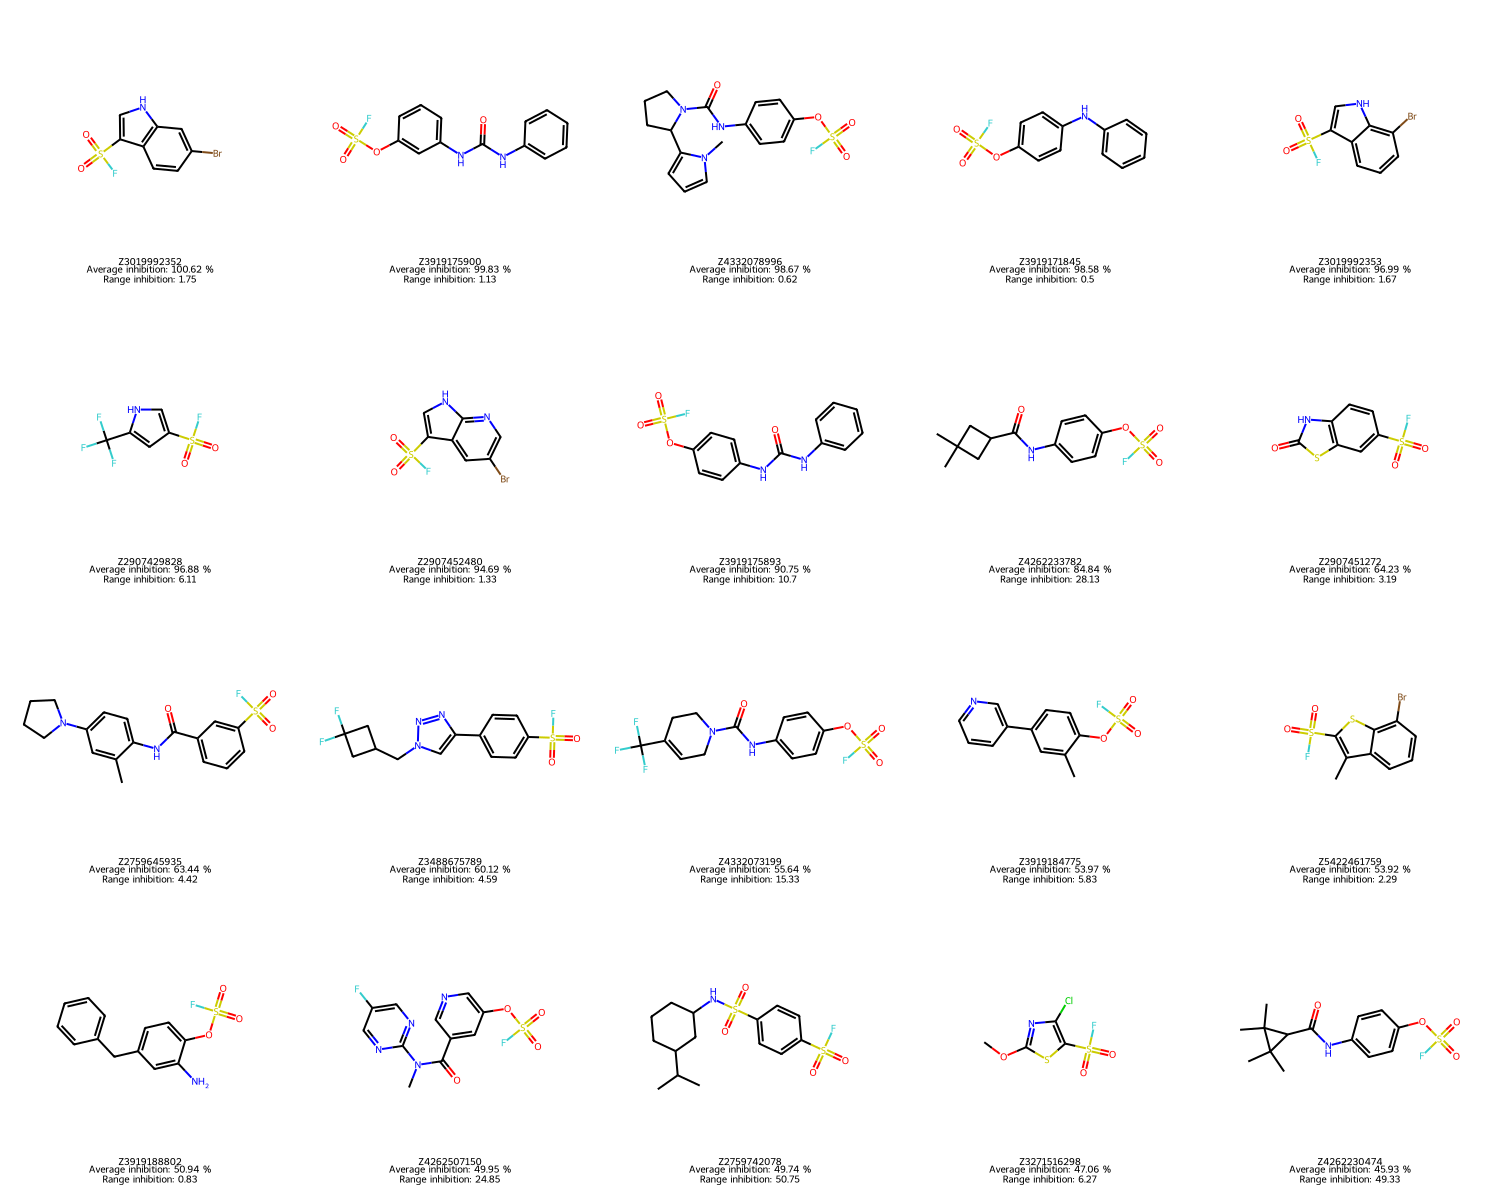

In [57]:
# Extract each parameter for hit visualisation into a list

hit_list_smiles = hits["SMILES"].tolist() # Creates an object containing the SMILES codes for the hits
hit_cat_no = hits["Catalog ID"].tolist() # Creates an object containing the unique identifier for the hits
hit_list_avpercentinh = hits["% inh average (n=2)"].tolist() # Creates an object containing the average inhibition of MRSA cell growth
trunc_avpercentinh = [float(f"{x:.2f}") for x in hit_list_avpercentinh] # Truncates each average percentage inhibition to 2 decimal places for clarity
hit_list_inhrange = hits["% inh range (n=2)"].tolist()
trunc_inhrange = [float(f"{x:.2f}") for x in hit_list_inhrange] # Truncates each average percentage inhibition to 2 decimal places for clarity

# Converts SMILES to rdkit SMILES format for visulisation

hit_smiles = [Chem.MolFromSmiles(smiles) for smiles in hitlist]

# Create a legend format that combines the above lists

hit_legends = [f"{cat_no}\nAverage inhibition: {inh} %\nRange inhibition: {inhrange}" for cat_no, inh, inhrange in zip(hit_cat_no, trunc_avpercentinh, trunc_inhrange)]

# Display the hits as 2D structures with legends containing unique identifiers and average inhibitory activity

hit_structures = Draw.MolsToGridImage(
    hit_smiles, 
    molsPerRow=5, 
    subImgSize=(300, 300),
    legends = hit_legends) # creates a grid view of the structures of the chemical hits

hit_structures